## Escalamiento de datos

### Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import timeit

In [3]:
from sklearn import datasets, linear_model

### Datos

In [4]:
data = datasets.load_diabetes()

In [5]:
X, y = datasets.load_diabetes(return_X_y=True) 

In [6]:
names = data.feature_names

In [7]:
df_X = pd.DataFrame(X)
df_X.columns=names

In [8]:
raw = X[:, None, 2]

### Reglas de escalamiento

In [9]:
max_raw = raw.max()
min_raw = raw.min()

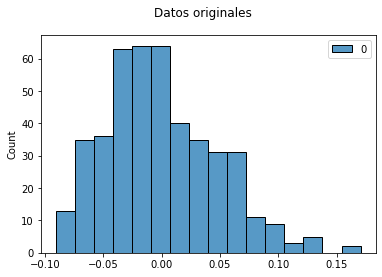

In [10]:
plt.suptitle('Datos originales')
sns.histplot(raw)
plt.show()

In [11]:
scaled = (2*raw - max_raw - min_raw)/(max_raw - min_raw)

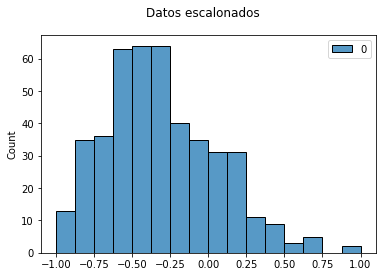

In [12]:
plt.suptitle('Datos escalonados')
sns.histplot(scaled)
plt.show()

### Gráficos combinados

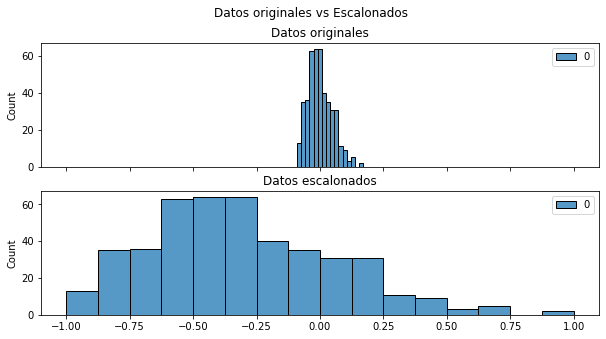

In [13]:
fig, ax = plt.subplots(2,1, figsize=(10,5), sharex=True)
fig.suptitle('Datos originales vs Escalonados')

sns.histplot(ax=ax[0], data=raw)
ax[0].set_title('Datos originales')

sns.histplot(ax=ax[1], data=scaled)
ax[1].set_title('Datos escalonados')
plt.show()

### Modelo

In [14]:
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

In [15]:
def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [30]:
raw_time = timeit.timeit(train_raw, number=100000)
scaled_time = timeit.timeit(train_scaled, number=100000)

In [32]:
# Comparamos los tiempos de cada modelo
round(raw_time, 2), round(scaled_time, 2)

(29.46, 26.67)

### Transformaciones no lineales

In [34]:
df = pd.read_csv('Data/cars.csv')

In [36]:
list(df)

['manufacturer_name',
 'model_name',
 'transmission',
 'color',
 'odometer_value',
 'year_produced',
 'engine_fuel',
 'engine_has_gas',
 'engine_type',
 'engine_capacity',
 'body_type',
 'has_warranty',
 'state',
 'drivetrain',
 'price_usd',
 'is_exchangeable',
 'location_region',
 'number_of_photos',
 'up_counter',
 'feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'duration_listed']

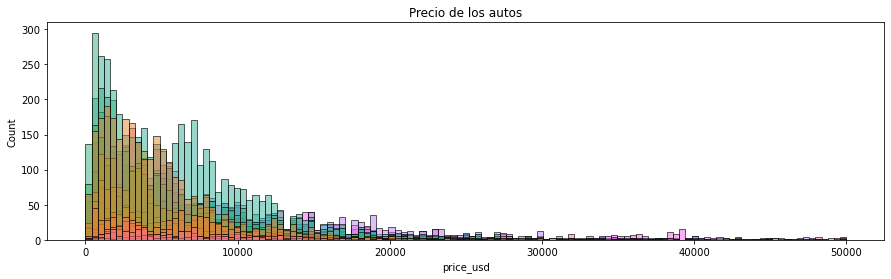

In [54]:
plt.figure(figsize=(15,4))
plt.title('Precio de los autos')
sns.histplot(data = df, x = df['price_usd'], hue=df['manufacturer_name'], legend=False)
plt.show()

<AxesSubplot:>

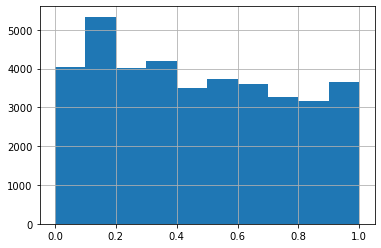

In [72]:
p = 10000
df['price_usd'].apply(lambda x: np.tanh(x/p)).hist()

In [56]:
df['price_usd']

0        10900.00
1         5000.00
2         2800.00
3         9999.00
4         2134.11
           ...   
38526     2750.00
38527     4800.00
38528     4300.00
38529     4000.00
38530     3200.00
Name: price_usd, Length: 38531, dtype: float64